In [ ]:
print("hello world")

hello world


In [ ]:
!pip install kaggle

# Setting up the Kaggle API and Downloading the data set

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c cifar-10

 99% 710M/715M [00:09<00:00, 116MB/s]
100% 715M/715M [00:09<00:00, 75.6MB/s]


In [ ]:
from zipfile import ZipFile

file_data = ZipFile("/content/cifar-10.zip", 'r')
file_data.extractall()

In [ ]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 26.1 MB/s eta 0:00:00


In [ ]:
import py7zr

large_file = py7zr.SevenZipFile("train.7z", "r")
large_file.extractall()

In [ ]:
import py7zr

test_large_file = py7zr.SevenZipFile("test.7z", "r")
test_large_file.extractall()


# Import The Necessary Dependencies

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
file_names = os.listdir("/content/train")
print(file_names[:5])

['45946.png', '13493.png', '24351.png', '17667.png', '48408.png']


In [ ]:
print(len(file_names))

50000


In [ ]:
label_data = pd.read_csv("/content/trainLabels.csv")
label_data.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
label_data.tail()

,id,label
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [ ]:
label_data['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [ ]:
labels_dict = {'airplane':0, 'dog':1, 'cat':2, 'ship':3, 'horse':4, 'bird':5, 'automobile':6, 'deer':7, 'truck':8, 'frog':9}
labels = [labels_dict[i] for i in label_data['label']]

In [ ]:
print(len(labels))

50000


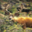

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/train/99.png")
cv2_imshow(img)

In [ ]:
print(labels[98])

7


In [ ]:
file_names[2]

'24351.png'

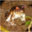

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

imgs = cv2.imread("/content/train/1.png")
cv2_imshow(imgs)

In [ ]:
path = "/content/train/"

label_list = list(label_data['id'])
img_list = []

for i in label_list:
  img = Image.open(path+str(i)+'.png')
  img = np.array(img)
  img_list.append(img)


print(len(img_list))

50000


In [ ]:
print(type(img_list[5]), img_list[5].shape)

<class 'numpy.ndarray'> (32, 32, 3)


In [ ]:
X = np.array(img_list)
Y = np.array(label_list)

# Splitting the Data into Training and Testing

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X_train.shape, x_test.shape, Y_train.shape, y_test.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (40000,) (10000,)


In [ ]:
print(len(X_train[0][0][0]))

3


In [ ]:
print(X_train[0])

[[[209 210 203]
  [213 214 209]
  [218 219 215]
  ...
  [127  74  39]
  [122  68  35]
  [116  63  32]]

 [[210 210 202]
  [213 214 207]
  [218 220 214]
  ...
  [124  70  35]
  [121  67  33]
  [123  69  36]]

 [[206 205 195]
  [209 209 202]
  [213 215 209]
  ...
  [124  70  37]
  [131  77  42]
  [131  78  41]]

 ...

 [[127 108  97]
  [138 122 110]
  [141 127 118]
  ...
  [158 149 134]
  [161 156 151]
  [136 137 148]]

 [[145 130 119]
  [148 135 128]
  [136 127 128]
  ...
  [175 174 172]
  [160 161 170]
  [143 148 164]]

 [[138 128 123]
  [140 132 136]
  [136 131 140]
  ...
  [150 154 169]
  [145 149 166]
  [140 145 163]]]


In [ ]:
X_train = X_train/255.0
x_test = x_test/255.0

In [ ]:
print(X_train[0])

[[[0.81960784 0.82352941 0.79607843]
  [0.83529412 0.83921569 0.81960784]
  [0.85490196 0.85882353 0.84313725]
  ...
  [0.49803922 0.29019608 0.15294118]
  [0.47843137 0.26666667 0.1372549 ]
  [0.45490196 0.24705882 0.1254902 ]]

 [[0.82352941 0.82352941 0.79215686]
  [0.83529412 0.83921569 0.81176471]
  [0.85490196 0.8627451  0.83921569]
  ...
  [0.48627451 0.2745098  0.1372549 ]
  [0.4745098  0.2627451  0.12941176]
  [0.48235294 0.27058824 0.14117647]]

 [[0.80784314 0.80392157 0.76470588]
  [0.81960784 0.81960784 0.79215686]
  [0.83529412 0.84313725 0.81960784]
  ...
  [0.48627451 0.2745098  0.14509804]
  [0.51372549 0.30196078 0.16470588]
  [0.51372549 0.30588235 0.16078431]]

 ...

 [[0.49803922 0.42352941 0.38039216]
  [0.54117647 0.47843137 0.43137255]
  [0.55294118 0.49803922 0.4627451 ]
  ...
  [0.61960784 0.58431373 0.5254902 ]
  [0.63137255 0.61176471 0.59215686]
  [0.53333333 0.5372549  0.58039216]]

 [[0.56862745 0.50980392 0.46666667]
  [0.58039216 0.52941176 0.50196078]


# Building The Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 10

#setting up the Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Compiling the Neural Network

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.fit(X_train, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 1.5931e-05 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 1.0406e-04 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 5.6994e-05 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 1.3304e-05 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 1.0034e-06 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 3.9374e-06 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 1.0016e-04 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 2.1535e-05

# ResNet 50

In [ ]:
from tensorflow.keras import layers, Sequential, models
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)